<a href="https://colab.research.google.com/github/arsyadfr9/learn-github/blob/main/Fruit_Images_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import cv2
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import layers, models
from plotly.subplots import make_subplots
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from PIL import Image
import plotly.offline as pyo
from IPython.display import display
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

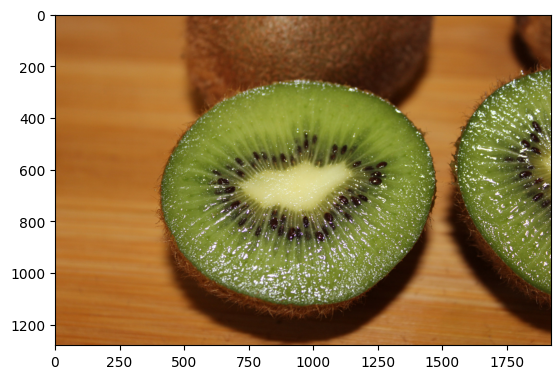

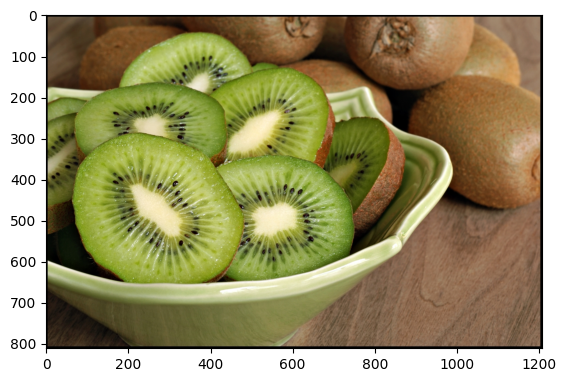

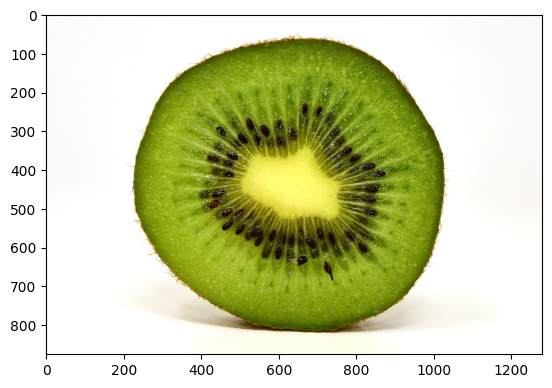

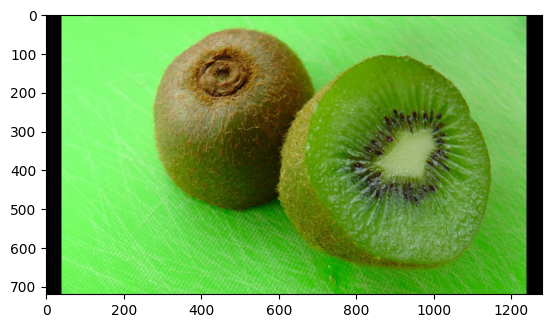

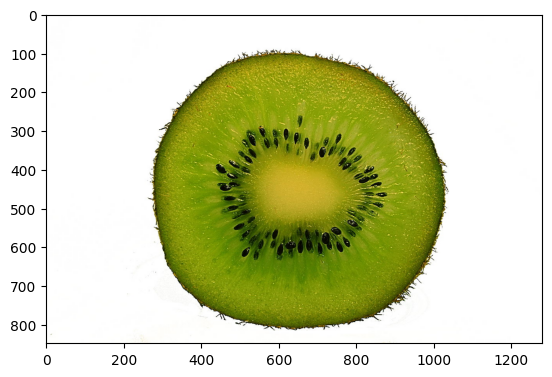

In [ ]:
path_to_main_directory = r"/content/drive/MyDrive/Python Image Analytics/images/"
images = []
for subdirectory in os.listdir ( path_to_main_directory ):
# Construct the path to the subdirectory
  subdirectory_path = os.path.join ( path_to_main_directory , subdirectory )
# Iterate in the subdirectory and add images to the list
for filename in os . listdir ( subdirectory_path ):
  img_path = os.path.join ( subdirectory_path , filename )
  img = cv2 . imread ( img_path )
  if img is not None :
    images . append ( img )
# displaying images
import matplotlib . pyplot as plt
for i in range (5):
  plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
  plt . show ()

In [ ]:
import os
path_to_folder = r"/content/drive/MyDrive/Python Image Analytics/images/"
subdirectories = [f . path for f in os . scandir ( path_to_folder ) if f.is_dir ()]
print (len ( subdirectories ))

9


In [ ]:
import os
path_to_images = r"/content/drive/MyDrive/Python Image Analytics/images/"
# Get a list of all files and directories in the path
contents = os . listdir ( path_to_images )
# Loop through each item in the list
for item in contents :
  if os . path . isdir ( os . path . join ( path_to_images , item )):
    print (" Found directory :", item )

 Found directory : banana fruit
 Found directory : apple fruit
 Found directory : chickoo fruit
 Found directory : grapes fruit
 Found directory : mango fruit
 Found directory : strawberry fruit
 Found directory : orange fruit
 Found directory : cherry fruit
 Found directory : kiwi fruit


In [ ]:
import os
root_path = r"/content/drive/MyDrive/Python Image Analytics/images/"
num_images = 0
for dirpath , dirnames , filenames in os . walk ( root_path ):
  for filename in filenames :
    if filename . lower () . endswith (( '.png', '.jpg', '.jpeg')):
      num_images += 1
  print (f" Found { num_images } images in directory : { dirpath }")
  num_images = 0

 Found 0 images in directory : /content/drive/MyDrive/Python Image Analytics/images/
 Found 40 images in directory : /content/drive/MyDrive/Python Image Analytics/images/banana fruit
 Found 40 images in directory : /content/drive/MyDrive/Python Image Analytics/images/apple fruit
 Found 40 images in directory : /content/drive/MyDrive/Python Image Analytics/images/chickoo fruit
 Found 40 images in directory : /content/drive/MyDrive/Python Image Analytics/images/grapes fruit
 Found 39 images in directory : /content/drive/MyDrive/Python Image Analytics/images/mango fruit
 Found 40 images in directory : /content/drive/MyDrive/Python Image Analytics/images/strawberry fruit
 Found 40 images in directory : /content/drive/MyDrive/Python Image Analytics/images/orange fruit
 Found 40 images in directory : /content/drive/MyDrive/Python Image Analytics/images/cherry fruit
 Found 40 images in directory : /content/drive/MyDrive/Python Image Analytics/images/kiwi fruit


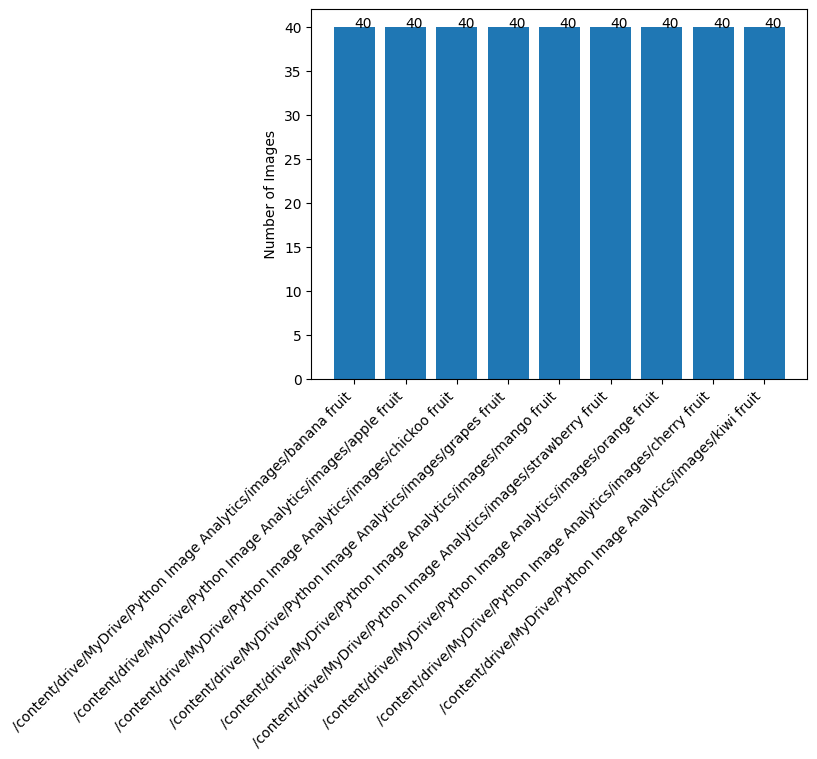

In [ ]:
subdirectories = [os . path . join ( root_path , d) for d in os . listdir (
root_path ) if os . path . isdir ( os .
path . join ( root_path , d))]
# Count the number of images in each subdirectory
counts = [0] * len ( subdirectories )
for i , directory in enumerate ( subdirectories ):
  counts [i] = len ( os . listdir ( directory ) )
# Create a bar chart to visualize the distribution
plt . bar ( subdirectories , counts )
plt . xticks ( rotation =45 , ha='right')
plt . ylabel (" Number of Images ")
for i in range ( len ( subdirectories ) ):
  plt . text (i , counts [i], counts [i])
plt . show ()

In [6]:
import os
import cv2
import numpy as np
root_path = r"/content/drive/MyDrive/Python Image Analytics/images/"
sizes = []
resolutions = []
color_distributions = []
# Iterate over each image file in each subdirectory
for dirpath , dirnames , filenames in os . walk ( root_path ):
  for filename in filenames :
    if filename . lower () . endswith (( '.png', '.jpg', '.jpeg')):
# Load the image file using OpenCV
      img_path = os . path . join ( dirpath , filename )
      img = cv2 . imread ( img_path )
      # Extract the size of the image
      size = os . path . getsize ( img_path )
      sizes . append ( size )
            # Extract the resolution of the image
      resolution = img . shape [:2]
      resolutions . append ( resolution )
            # Extract the color distribution of the image
      color_distribution = np . bincount ( img . flatten (), minlength = 256 )
      color_distributions.append ( color_distribution )
# Convert the lists to numpy arrays for easier manipulation
sizes = np . array ( sizes )
resolutions = np . array ( resolutions )
color_distributions = np . array ( color_distributions )

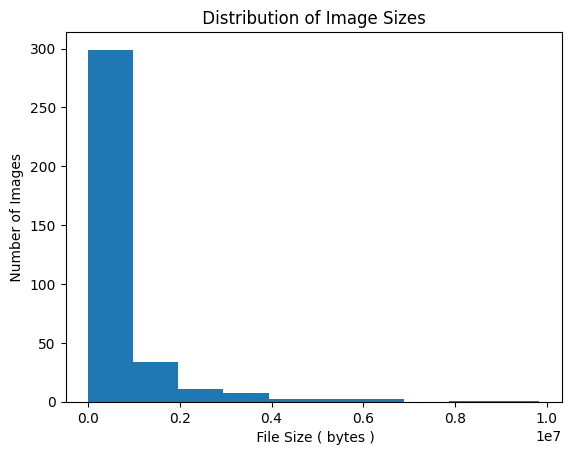

In [7]:
import matplotlib . pyplot as plt
# Plot a histogram of the image sizes
plt.hist ( sizes )
plt.title (" Distribution of Image Sizes ")
plt.xlabel (" File Size ( bytes )")
plt.ylabel (" Number of Images ")
plt.show ()

In [8]:
import plotly.express as px
import os
# Root directory path
root_path = r"/content/drive/MyDrive/Python Image Analytics/images/"
# List to store file sizes
sizes = []
# Iterate over each file in the root directory and its subdirectories
for dirpath , dirnames , filenames in os . walk ( root_path ):
  for filename in filenames :
# Get the full path of the file
    file_path = os . path . join ( dirpath , filename )
# Get the file size in bytes
    file_size = os . path . getsize ( file_path )
# Convert file size to MB and add to the list
    sizes . append ( file_size / 1_000_000 )
# Create a histogram figure with plotly
fig = px . histogram (x=sizes , nbins =50 , title =" Distribution of Image Sizes ")
# Customize the plot
fig . update_layout (xaxis_title =" File Size (MB)",yaxis_title =" Number of Images ",showlegend =False ,bargap =0.1 ,bargroupgap =0.1)
# Show the plot
fig . show ()

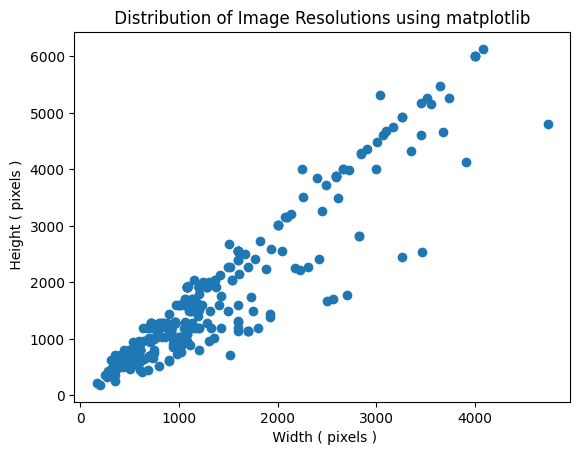

In [9]:
import matplotlib . pyplot as plt
# Plot a scatter plot of the image resolutions
plt . scatter ( resolutions [:, 0], resolutions [:, 1])
plt . title (" Distribution of Image Resolutions using matplotlib ")
plt . xlabel (" Width ( pixels )")
plt . ylabel (" Height ( pixels )")
plt . show ()

In [10]:
import plotly . express as px
# Create a scatter plot figure with plotly
fig = px.scatter ( x= resolutions [:, 0], y= resolutions [:, 1], title ="Distribution of Image Resolutions using Plotly ")
# Customize the plot
fig.update_layout (xaxis_title =" Width ( pixels )", yaxis_title =" Height ( pixels )", showlegend =False , hovermode ='closest', width =800 , height =600 , margin = dict ( l=50 , r=50 , b=50 , t=50 , pad =4))
fig . show ()

In [11]:
import pandas as pd
import plotly . express as px
# Create a dataframe with the resolutions
df = pd . DataFrame (resolutions, columns =['width', 'height'])
# Create a 3D scatter plot with plotly
fig = px . scatter_3d (df , x='width', y='height', z = df.index , title ='Distribution of Image Resolutions', labels ={'width': 'Width ( pixels )', 'height': 'Height ( pixels )', 'index' : 'Image Index' }, color = df.index )
fig . update_traces ( marker = dict ( size =2 , line = dict ( width =0.5)))
fig.show()

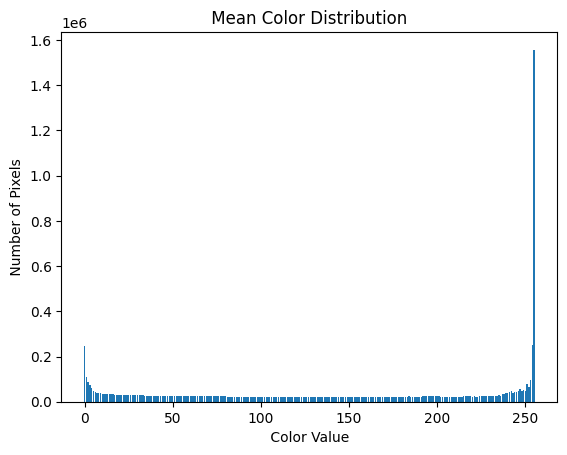

In [12]:
import matplotlib . pyplot as plt
# Calculate the mean color distribution across all images
mean_color_distribution = np.mean ( color_distributions , axis =0)
# Plot a bar chart of the mean color distribution
plt . bar ( np.arange ( 256 ) , mean_color_distribution )
plt . title (" Mean Color Distribution ")
plt . xlabel (" Color Value ")
plt . ylabel (" Number of Pixels ")
plt . show ()

In [13]:
import plotly . graph_objects as go
# Calculate the mean color distribution across all images
mean_color_distribution = np . mean ( color_distributions , axis =0)
# Create a bar chart of the mean color distribution
fig = go . Figure (go.Bar (x=np . arange ( 256 ) , y= mean_color_distribution , name =" Mean Color Distribution "))
# Set the title and axis labels
fig . update_layout (title =" Mean Color Distribution ", xaxis_title =" Color Value ", yaxis_title =" Number of Pixels ")
fig.show()

In [14]:
import plotly . graph_objs as go
# Create a list of bar traces for each color value
traces = []
for i in range ( 256 ):
  traces.append ( go . Bar ( x=np . arange ( len ( color_distributions )) , y=color_distributions [:, i], name = str (i)) )
# Create the figure and set the layout
fig = go . Figure ( data = traces )
fig . update_layout ( title ='Color Distributions for Each Image', xaxis_title ='Image Index', yaxis_title ='Number of Pixels', barmode ='stack' )
# Show the plot
fig . show ()

Found 360 files belonging to 9 classes.
Using 252 files for training.
Found 360 files belonging to 9 classes.
Using 108 files for validation.
['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']


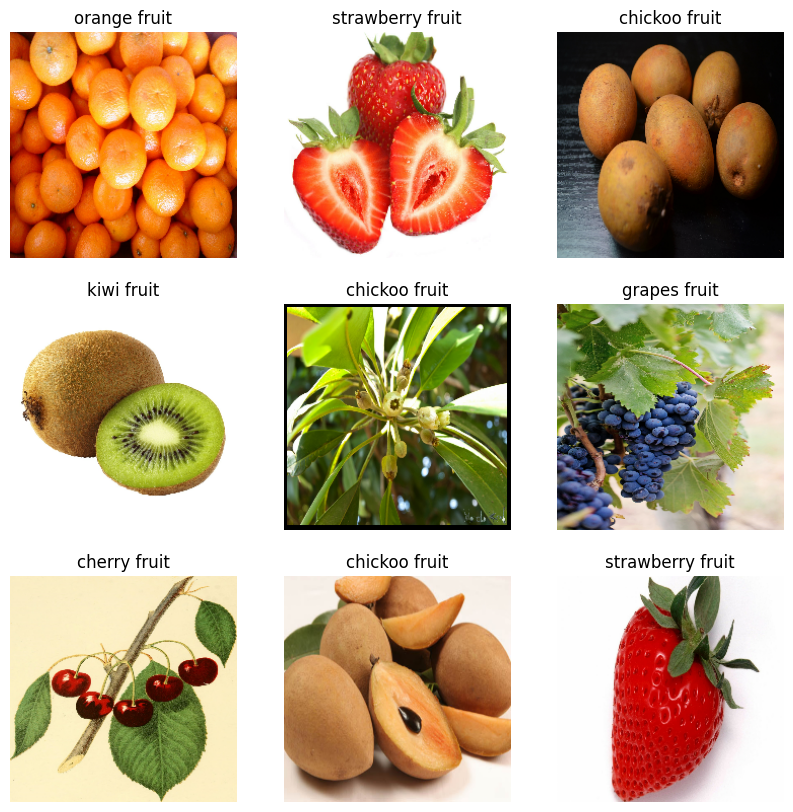

In [ ]:
import tensorflow as tf
# Set the path to the directory containing the images
data_dir = r"/content/drive/MyDrive/Python Image Analytics/images/"
# Define the batch size and image size
batch_size = 32
img_size = ( 224 , 224 )
# Use the ‘ i m a g e _ d a t a s e t _ f r o m _ d i r e c t o r y ‘ function to create a dataset
train_ds = tf . keras . preprocessing . image_dataset_from_directory (data_dir ,validation_split =0.3 , subset ='training',seed =123 ,image_size = img_size ,batch_size = batch_size ,)
val_ds = tf . keras . preprocessing . image_dataset_from_directory (data_dir ,validation_split =0.3 ,subset ='validation',seed =123 ,image_size = img_size ,batch_size = batch_size ,)
# Print the class names
class_names = train_ds . class_names
print ( class_names )
# Visualize some of the images
import matplotlib . pyplot as plt
plt . figure ( figsize =( 10 , 10 ))
for images , labels in train_ds . take (1 ):
  for i in range ( 9):
    ax = plt . subplot (3 , 3 , i + 1)
    plt . imshow ( images [i]. numpy () . astype ('uint8'))
    plt . title ( class_names [ labels [i]])
    plt . axis ('off')
plt . show ()

In [ ]:
from tensorflow . keras import layers , models
# Create the model
model = models . Sequential ([layers . experimental . preprocessing . Rescaling ( 1./255 , input_shape=( 224 , 224 , 3) ) ,layers . Conv2D (16 , (3 , 3 ) , activation ='relu') ,layers . MaxPooling2D ((2 , 2)) ,layers . Conv2D (32 , (3 , 3 ) , activation ='relu') ,layers . MaxPooling2D ((2 , 2)) ,layers . Conv2D (64 , (3 , 3 ) , activation ='relu') ,layers . MaxPooling2D ((2 , 2)) ,layers . Flatten () ,layers . Dense (64 , activation ='relu') ,layers . Dense (len ( class_names ))])
# Compile the model
model . compile ( optimizer ='adam',loss =tf . keras . losses . SparseCategoricalCrossentropy (from_logits = True ) ,metrics =['accuracy'])
# Train the model on the training data
history = model . fit ( train_ds , epochs =20 , validation_data = val_ds )

Epoch 1/20
8/8 [==============================] - 22s 2s/step - loss: 2.3633 - accuracy: 0.1984 - val_loss: 2.1366 - val_accuracy: 0.1667
Epoch 2/20
8/8 [==============================] - 21s 2s/step - loss: 1.9531 - accuracy: 0.2897 - val_loss: 2.0555 - val_accuracy: 0.1667
Epoch 3/20
8/8 [==============================] - 22s 2s/step - loss: 1.6996 - accuracy: 0.3611 - val_loss: 1.8020 - val_accuracy: 0.3056
Epoch 4/20
8/8 [==============================] - 29s 3s/step - loss: 1.3316 - accuracy: 0.5516 - val_loss: 1.8236 - val_accuracy: 0.2778
Epoch 5/20
8/8 [==============================] - 21s 2s/step - loss: 0.9601 - accuracy: 0.6706 - val_loss: 1.5499 - val_accuracy: 0.4444
Epoch 6/20
8/8 [==============================] - 22s 2s/step - loss: 0.7584 - accuracy: 0.7381 - val_loss: 1.6500 - val_accuracy: 0.5000
Epoch 7/20
8/8 [==============================] - 27s 3s/step - loss: 0.4977 - accuracy: 0.8690 - val_loss: 1.6382 - val_accuracy: 0.5278
Epoch 8/20
8/8 [==================

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)       

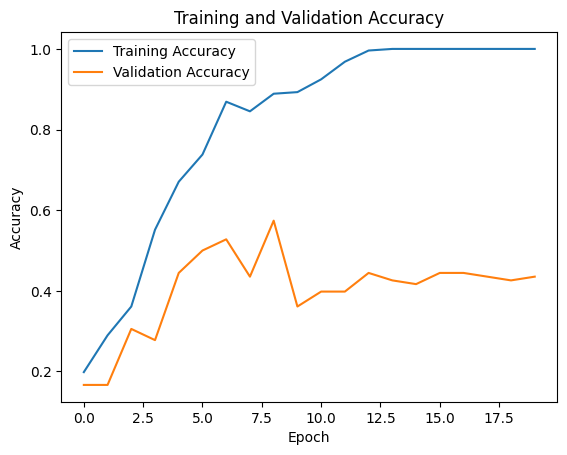

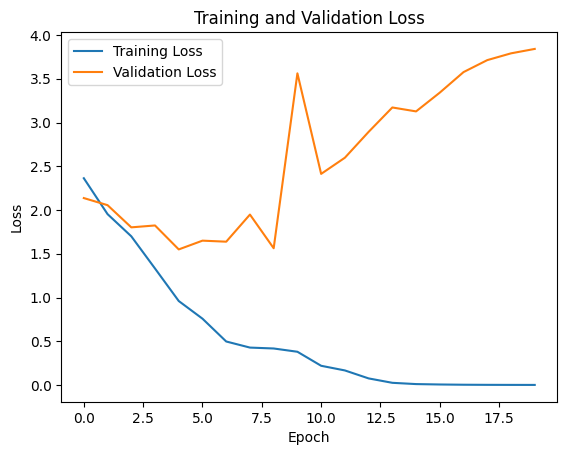

In [ ]:
plt . plot ( history . history ['accuracy'], label ='Training Accuracy')
plt . plot ( history . history ['val_accuracy'], label ='Validation Accuracy')
plt . title ('Training and Validation Accuracy')
plt . xlabel ('Epoch')
plt . ylabel ('Accuracy')
plt . legend ()
plt . show ()
# Plot the training and validation loss
plt . plot ( history . history ['loss'], label ='Training Loss')
plt . plot ( history . history ['val_loss'], label ='Validation Loss')
plt . title ('Training and Validation Loss')
plt . xlabel ('Epoch')
plt . ylabel ('Loss')
plt . legend ()
plt . show ()

In [ ]:
import plotly . graph_objects as go
from plotly . subplots import make_subplots
# Plot the training and validation accuracy
fig1 = make_subplots ()
fig1 . add_trace ( go . Scatter ( x= list ( range (1 , 11 ) ) , y= history . history ['accuracy'], name ='Training Accuracy'))
fig1 . add_trace ( go . Scatter ( x= list ( range (1 , 11 ) ) , y= history . history ['val_accuracy'], name ='Validation Accuracy'))
fig1 . update_layout ( title ='Training and Validation Accuracy',xaxis_title ='Epoch', yaxis_title = 'Accuracy')
fig1 . show ()
# Plot the training and validation loss
fig2 = make_subplots ()
fig2 . add_trace ( go . Scatter ( x= list ( range (1 , 11 ) ) , y= history . history ['loss'], name ='Training Loss'))
fig2 . add_trace ( go . Scatter ( x= list ( range (1 , 11 ) ) , y= history . history ['val_loss'], name ='Validation Loss'))
fig2 . update_layout ( title ='Training and Validation Loss',xaxis_title ='Epoch', yaxis_title ='Loss')
fig2 . show ()

In [ ]:
import torch
import torchvision
import torchvision . transforms as transforms
import torch . nn as nn
import torch . optim as optim
from sklearn . metrics import precision_score , recall_score , f1_score
# Define transform to normalize the images
transform = transforms . Compose (
    [ transforms . Resize (( 32 , 32 )) ,
     transforms . ToTensor () ,
      transforms . Normalize (( 0.5 , 0.5 , 0.5 ) , (0.5 , 0.5 , 0.5))])
# Load the dataset and split it into train and test sets
# Change num_workers =2 if you want to use GPU ( parallel processing )
trainset = torchvision . datasets . ImageFolder (root =r"/content/drive/MyDrive/Python Image Analytics/images/", transform = transform)
trainloader = torch . utils . data . DataLoader (trainset , batch_size =32 ,
                                                 shuffle =True , num_workers =0)
valset = torchvision . datasets . ImageFolder (root =r"/content/drive/MyDrive/Python Image Analytics/images/", transform = transform)
valloader = torch . utils . data . DataLoader ( valset , batch_size =32 , shuffle =False , num_workers =0)
# Define the CNN architecture
class Net ( nn . Module ):
  def __init__ ( self ):
    super ( Net , self ). __init__ ()
    self . conv1 = nn . Conv2d (3 , 32 , 3 , padding =1 )
    self . conv2 = nn . Conv2d ( 32 , 64 , 3 , padding =1)
    self . pool = nn . MaxPool2d (2 , 2)
    self . fc1 = nn . Linear ( 64 * 8 * 8 , 512 )
    self . fc2 = nn . Linear ( 512 , 131 )
  def forward ( self , x):
    x = self . pool ( nn . functional . relu ( self . conv1 (x)) )
    x = self . pool ( nn . functional . relu ( self . conv2 (x)) )
    x = x . view (-1 , 64 * 8 * 8 )
    x = nn . functional . relu ( self . fc1 (x ))
    x = self . fc2 (x )
    return x
# Initialize the CNN
net = Net ()
# Define the loss function and optimizer
criterion = nn . CrossEntropyLoss ()
optimizer = optim . Adam ( net . parameters () , lr=0.001 )
# Train the CNN
for epoch in range ( 10 ):
  running_loss = 0.0
  for i , data in enumerate ( trainloader , 0):
    inputs , labels = data
    optimizer . zero_grad ()
    outputs = net ( inputs )
    loss = criterion ( outputs , labels )
    loss . backward ()
    optimizer . step ()
    running_loss += loss . item ()
    if i % 200 == 199:
      print (f"[ Epoch { epoch + 1}, Batch {i + 1}] Loss : {running_loss / 200 }")
      running_loss = 0.0
print (" Finished training ")
# Evaluate the CNN on the validation set
net . eval ()
total = 0
correct = 0
val_preds = []
val_labels = []
with torch . no_grad ():
  for images , labels in valloader :
    outputs = net ( images )
    _ , predicted = torch . max ( outputs . data , 1 )
    val_preds . extend ( predicted . tolist () )
    val_labels . extend ( labels . tolist () )
    total += labels . size ( 0)
    correct += ( predicted == labels ). sum () . item ()
# Calculate precision , recall , and F1 score
accuracy = 100 * correct / total
print (f" Accuracy : { accuracy }%")
precision = precision_score ( val_labels , val_preds , average ='macro')
recall = recall_score ( val_labels , val_preds , average ='macro')
f1 = f1_score ( val_labels , val_preds , average ='macro')
print (f" Precision : { precision }")
print (f" Recall : { recall }")
print (f"F1 score : {f1}")

 Finished training 
 Accuracy : 83.56545961002786%
 Precision : 0.8593583769144364
 Recall : 0.8354700854700855
F1 score : 0.8312773688838737


In [ ]:
from sklearn . metrics import confusion_matrix
# Evaluate the CNN on the validation set
net . eval ()
val_preds = []
val_labels = []
with torch . no_grad ():
  for images , labels in valloader :
    outputs = net ( images )
    _ , predicted = torch . max ( outputs . data , 1 )
    val_preds . extend ( predicted . tolist () )
    val_labels . extend ( labels . tolist () )
# Compute the confusion matrix
conf_matrix = confusion_matrix ( val_labels , val_preds )
# Print the confusion matrix
print ( conf_matrix )

[[36  0  1  0  0  2  0  0  1]
 [ 0 38  0  0  0  1  1  0  0]
 [ 0  0 37  0  0  0  0  0  3]
 [ 1  5  0 19  1  9  5  0  0]
 [ 1  1  0  0 29  6  0  0  3]
 [ 0  0  0  1  0 39  0  0  0]
 [ 2  3  0  1  0  3 30  0  0]
 [ 1  3  0  0  0  0  4 32  0]
 [ 0  0  0  0  0  0  0  0 40]]


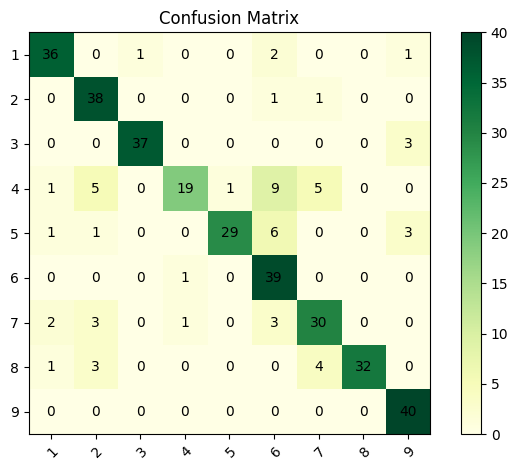

In [ ]:
import matplotlib . pyplot as plt
import numpy as np
data = conf_matrix
fig , ax = plt . subplots ()
im = ax . imshow ( data , cmap ='YlGn')
# Set ticks for x and y axis
ax . set_xticks ( np . arange ( len ( data [0])))
ax . set_yticks ( np . arange ( len ( data )) )
# Set labels for x and y axis
ax . set_xticklabels ([ str (i ) for i in range (1 , 10 )])
ax . set_yticklabels ([ str (i ) for i in range (1 , 10 )])
# Set ticks at 45 degrees for x axis labels
plt . setp ( ax . get_xticklabels () , rotation =45 , ha='right',
            rotation_mode ='anchor')
# Loop over data dimensions and create text annotations .
for i in range ( len ( data )):
  for j in range ( len ( data [0])):
    text = ax . text (j , i , data [i][j], ha='center', va='center',
                      color ='black')
# Add a colorbar
cbar = ax . figure . colorbar (im , ax=ax )
# Set title and show the plot
ax . set_title ('Confusion Matrix')
fig . tight_layout ()
plt . show ()

In [ ]:
print (" *** Model Generation ")
import tensorflow as tf
data_dir = r"/content/drive/MyDrive/Python Image Analytics/images/"
batch_size = 32
img_size = ( 224 , 224 )
print (" ***** Image reading and splitting ")
train_ds = tf . keras . preprocessing . image_dataset_from_directory (
    data_dir ,
    validation_split =0.3 ,
    subset ='training',
    seed =123 ,
    image_size = img_size ,
    batch_size = batch_size ,
    )
val_ds = tf . keras . preprocessing . image_dataset_from_directory (
    data_dir ,
    validation_split =0.3 ,
    subset ='validation',
    seed =123 ,
    image_size = img_size ,batch_size = batch_size ,
    )
class_names = train_ds . class_names
print (" Class Names :")
print ( class_names )
from tensorflow . keras import layers , models
model = models . Sequential ([
    layers . experimental . preprocessing . Rescaling ( 1./255 , input_shape
                                                       =( 224 , 224 , 3) ) ,
    layers . Conv2D (16 , (3 , 3 ) , activation ='relu') ,
    layers . MaxPooling2D ((2 , 2)) ,
    layers . Conv2D (32 , (3 , 3 ) , activation ='relu') ,
    layers . MaxPooling2D ((2 , 2)) ,
    layers . Conv2D (64 , (3 , 3 ) , activation ='relu') ,
    layers . MaxPooling2D ((2 , 2)) ,
    layers . Flatten () ,
    layers . Dense (64 , activation ='relu') ,
    layers . Dense (len ( class_names ))
    ])
print (" ***** Model Compile ")
model . compile ( optimizer ='adam',
                 loss =tf . keras . losses . SparseCategoricalCrossentropy (
                    from_logits = True ) ,
metrics =['accuracy'])
print (" ***** Model Fitting started , please wait ...")
history = model . fit ( train_ds , epochs =20 , validation_data = val_ds )
print (" *** Model Prediction ")
from PIL import Image
import numpy as np
img = Image . open (r"/content/drive/MyDrive/Python Image Analytics/images/grapes fruit/Image_22.jpg")
# resize the image
img = img . resize (( 224 , 224 ))
# convert to numpy array and normalize
img_array = np . array ( img )
img_tensor = img_array . astype ('float32')
img_tensor /= 255
img_tensor = np . expand_dims ( img_tensor , axis =0)
# predict using the model
prediction = model . predict ( img_tensor )
predicted_class = np . argmax ( prediction )
print (" Predicted class label :", predicted_class )

 *** Model Generation 
 ***** Image reading and splitting 
Found 360 files belonging to 9 classes.
Using 252 files for training.
Found 360 files belonging to 9 classes.
Using 108 files for validation.
 Class Names :
['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']
 ***** Model Compile 
 ***** Model Fitting started , please wait ...
Epoch 1/20
8/8 [==============================] - 29s 3s/step - loss: 3.0757 - accuracy: 0.1548 - val_loss: 2.1257 - val_accuracy: 0.2500
Epoch 2/20
8/8 [==============================] - 23s 2s/step - loss: 1.9622 - accuracy: 0.2619 - val_loss: 2.0273 - val_accuracy: 0.2037
Epoch 3/20
8/8 [==============================] - 28s 3s/step - loss: 1.7398 - accuracy: 0.3810 - val_loss: 2.0266 - val_accuracy: 0.1944
Epoch 4/20
8/8 [==============================] - 23s 2s/step - loss: 1.4801 - accuracy: 0.5397 - val_loss: 1.8557 - val_accuracy: 0.2870
Epoch 5/20
8/8 [=

In [ ]:
import tensorflow as tf
from tensorflow . keras . layers import GlobalAveragePooling2D , Dense
from tensorflow . keras . models import Model
# Set the path to the directory containing the images
data_dir = r"/content/drive/MyDrive/Python Image Analytics/images"
# Define the batch size and image size
batch_size = 32
img_size = ( 224 , 224 )
# Use the ‘ i m a g e _ d a t a s e t _ f r o m _ d i r e c t o r y ‘ function to create a dataset
train_ds = tf . keras . preprocessing . image_dataset_from_directory (
    data_dir ,
    validation_split =0.3 ,
    subset ='training',
    seed =123 ,
    image_size = img_size ,
    batch_size = batch_size ,)
val_ds = tf . keras . preprocessing . image_dataset_from_directory (
    data_dir ,
    validation_split =0.3 ,
    subset ='validation',
    seed =123 ,
    image_size = img_size ,
    batch_size = batch_size ,)
class_names = train_ds . class_names
# Preprocess the images for the MobileNetV2 model
preprocess_input = tf . keras . applications . mobilenet_v2 . preprocess_input
train_ds = train_ds . map ( lambda x , y: ( preprocess_input (x) , y) )
val_ds = val_ds . map ( lambda x , y: ( preprocess_input (x) , y))
# Load the MobileNetV2 model without the top layer
base_model = tf . keras . applications . MobileNetV2 ( input_shape =( 224 ,224 , 3) ,
                                                      include_top =False ,
                                                       weights ='imagenet')
# Freeze the base model ’s layers
for layer in base_model . layers :
  layer . trainable = False
x = GlobalAveragePooling2D () ( base_model . output )
output = Dense (len ( class_names ) , activation ='softmax') (x)
# Create the transfer learning model
model = Model ( inputs = base_model .input , outputs = output )
# Compile the model
model . compile ( optimizer ='adam',
                 loss ='sparse_categorical_crossentropy',
                  metrics =['accuracy'])
# Train the model
history = model . fit ( train_ds , validation_data = val_ds , epochs =20 )
# Evaluate the model
loss , accuracy = model . evaluate ( val_ds )
print (f" Validation loss : { loss }, Validation accuracy : { accuracy }")

Found 360 files belonging to 9 classes.
Using 252 files for training.
Found 360 files belonging to 9 classes.
Using 108 files for validation.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/20
8/8 [==============================] - 89s 2s/step - loss: 1.9333 - accuracy: 0.3175 - val_loss: 1.5972 - val_accuracy: 0.5093
Epoch 2/20
8/8 [==============================] - 29s 3s/step - loss: 1.0627 - accuracy: 0.7698 - val_loss: 1.0690 - val_accuracy: 0.7130
Epoch 3/20
8/8 [==============================] - 26s 3s/step - loss: 0.6195 - accuracy: 0.9008 - val_loss: 0.7880 - val_accuracy: 0.8148
Epoch 4/20
8/8 [==============================] - 27s 3s/step - loss: 0.4035 - accuracy: 0.9325 - val_loss: 0.6394 - val_accuracy: 0.8796
Epoch 5/20
8/8 [==============================] - 26s 3s/step - loss: 0.2838 - accuracy: 0.9563 - val_loss: 0.5581 - val_accuracy: 0.8889
Epoch 6/20
8/8 [==============================] - 25s 3s/step - loss: 0.2175 - accuracy: 0.9762 - val_los

In [ ]:
from PIL import Image
import numpy as np
# load the image
img = Image . open (r"/content/drive/MyDrive/Python Image Analytics/test images/test_strawberry.jpg")
# resize the image
img = img . resize (( 224 , 224 ))
# convert to numpy array and normalize
img_array = np . array ( img )
img_tensor = img_array . astype ('float32')
img_tensor /= 255
img_tensor = np . expand_dims ( img_tensor , axis =0)
# predict using the model
prediction = model . predict ( img_tensor )
predicted_class = np . argmax ( prediction )
print ("Predicted class label :", predicted_class )

1/1 [==============================] - 0s 59ms/step
Predicted class label : 8
